# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.10.0-zeta.new.269.319.fix.307.309.refactor.291'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **14th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{4: ['Fiji'],
 5: ['Tunisia', 'Dominica'],
 6: ['Brunei', 'Papua New Guinea', 'Sri Lanka', 'Tanzania', 'Andorra',
     'Slovenia', 'Liechtenstein', 'Georgia', 'Slovakia', 'Croatia', 'Poland'],
 7: ['Czech Republic', 'Antigua and Barbuda', 'Ireland', 'Nicaragua', 'Hungary',
     'Seychelles', 'Saint Vincent and the Grenadines', 'Grenada', 'Saint Lucia',
     'Lithuania'],
 8: ['Madagascar', 'Malawi', 'Central African Republic', 'Angola', 'Nepal',
     'Botswana', 'Monaco', 'Jordan', 'Switzerland', 'Austria', 'Portugal',
     'Sao Tome and Principe', 'Myanmar', 'Cambodia', 'Cyprus', 'Malaysia'],
 9: ['South Sudan', 'Gambia', 'Trinidad and Tobago', 'Malta', 'Iceland',
     'Israel', 'Romania', 'Uganda', 'Jamaica', 'Mongolia', 'Burkina Faso',
     'Belgium', 'Tajikistan', 'Bulgaria', 'Spain', 'Djibouti', 'Cameroon',
     'Luxembourg', 'Zimbabwe', 'Rwanda', 'Bermuda', 'Comoros', 'Kazakhstan',
     'Eritrea', 'Yemen', 'Guinea-Bissau'],
 10: ['Suriname', 'Ecuador', 'Niger', 'Senegal', 'Libya'

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=14)
# The number of countries
len(analyser.countries)

6

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{14: ['Latvia', 'Russia', 'Somalia', 'Honduras'], 15: ['Belarus', 'Egypt']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Belarus 0th    Past  09Mar2020  26Apr2020     9483499
        1st    Past  27Apr2020  08May2020     9483499
        2nd    Past  09May2020  15May2020     9483499
        3rd    Past  16May2020  23May2020     9483499
        4th    Past  24May2020  30May2020     9483499
        5th    Past  31May2020  07Jun2020     9483499
        6th    Past  08Jun2020  14Jun2020     9483499
        7th    Past  15Jun2020  23Jun2020     9483499
        8th    Past  24Jun2020  11Jul2020     9483499
        9th    Past  12Jul2020  22Aug2020     9483499
        10th   Past  23Aug2020  24Sep2020     9483499
        11th   Past  25Sep2020  13Oct2020     9483499
        12th   Past  14Oct2020  24Oct2020     9483499
        13th   Past  25Oct2020  31Oct2020     9483499
        14th   Past  01Nov2020  09Nov2020     9483499
Egypt   0th    Past  28Feb2020  02May2020    98423595
        1st    Past  03May2020  17May2020    98423595
        2nd    Past  18May2020  28May2020    98423595
        3rd    Past  29May2020  03Jun2020    98423595
        4th    Past  04Jun2020  13Jun2020    98423595
        5th    Past  14Jun2020  23Jun2020    98423595
        6th    Past  24Jun2020  02Jul2020    98423595
        7th    Past  03Jul2020  13Jul2020    98423595
        8th    Past  14Jul2020  19Jul2020    98423595
        9th    Past  20Jul2020  27Jul2020    98423595
        10th   Past  28Jul2020  09Aug2020    98423595
        11th   Past  10Aug2020  27Aug2020    98423595
        12th   Past  28Aug2020  12Sep2020    98423595
        13th   Past  13Sep2020  08Oct2020    98423595
        14th   Past  09Oct2020  09Nov2020    98423595

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	BLR, 13th phase (25Oct2020 - 31Oct2020): finished  229 trials in 0 min 10 sec

	HND,  3rd phase (16Jul2020 - 24Jul2020): finished  331 trials in 0 min 15 sec

	EGY,  5th phase (14Jun2020 - 23Jun2020): finished  225 trials in 0 min 10 sec

	BLR, 12th phase (14Oct2020 - 24Oct2020): finished 1115 trials in 1 min  0 sec

	LVA,  5th phase (15May2020 - 27May2020): finished 1255 trials in 1 min  0 sec

	RUS,  5th phase (30Jun2020 - 17Jul2020): finished 1103 trials in 1 min  0 sec

	HND,  9th phase (23Sep2020 - 30Sep2020): finished 1110 trials in 1 min  0 sec

	HND,  8th phase (12Sep2020 - 22Sep2020): finished  613 trials in 0 min 35 sec

	SOM,  3rd phase (22May2020 - 27May2020): finished  977 trials in 1 min  0 sec

	EGY,  1st phase (03May2020 - 17May2020): finished  975 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 04May2020): finished  989 trials in 1 min  0 sec

	BLR,  1st phase (27Apr2020 - 08May2020): finished 1011 trials in 1 min  0 sec

	BLR,  4th phase (24May2020 - 30May2020): finished  671 trials in 0 min 35 sec

	BLR,  8th phase (24Jun2020 - 11Jul2020): finished 1080 trials in 1 min  0 sec

	EGY,  9th phase (20Jul2020 - 27Jul2020): finished  206 trials in 0 min 10 sec

	RUS,  4th phase (13Jun2020 - 29Jun2020): finished 1059 trials in 1 min  0 sec

	RUS,  7th phase (07Aug2020 - 28Aug2020): finished 1087 trials in 1 min  0 sec

	EGY,  8th phase (14Jul2020 - 19Jul2020): finished  408 trials in 0 min 20 sec

	SOM,  1st phase (04May2020 - 13May2020): finished 1097 trials in 1 min  0 sec

	HND, 10th phase (01Oct2020 - 08Oct2020): finished  208 trials in 0 min 10 sec

	LVA,  7th phase (09Jul2020 - 04Aug2020): finished 1215 trials in 1 min  0 sec

	SOM, 11th phase (16Sep2020 - 30Sep2020): finished 1200 trials in 1 min  0 sec

	EGY, 11th phase (10Aug2020 - 27Aug2020): finished  239 trials in 0 min 10 sec

	SOM, 13th phase (29Oct2020 - 09Nov2020): finished 1466 trials in 1 min  0 sec

	LVA,  4th phase (07May2020 - 14May2020): finished 1326 trials in 1 min  0 sec

	HND, 12th phase (18Oct2020 - 26Oct2020): finished 1179 trials in 1 min  0 sec

	RUS, 11th phase (17Oct2020 - 24Oct2020): finished 1215 trials in 1 min  0 sec

	EGY,  4th phase (04Jun2020 - 13Jun2020): finished  469 trials in 0 min 20 sec

	RUS, 10th phase (05Oct2020 - 16Oct2020): finished 1062 trials in 1 min  0 sec

	SOM, 10th phase (30Aug2020 - 15Sep2020): finished 1081 trials in 1 min  0 sec

	EGY,  0th phase (28Feb2020 - 02May2020): finished 1051 trials in 1 min  0 sec

	BLR,  2nd phase (09May2020 - 15May2020): finished 1075 trials in 1 min  0 sec

	BLR,  7th phase (15Jun2020 - 23Jun2020): finished  693 trials in 0 min 30 sec

	EGY,  3rd phase (29May2020 - 03Jun2020): finished  259 trials in 0 min 10 sec

	BLR,  3rd phase (16May2020 - 23May2020): finished 1190 trials in 1 min  0 sec

	BLR, 10th phase (23Aug2020 - 24Sep2020): finished 1186 trials in 1 min  0 sec

	EGY,  7th phase (03Jul2020 - 13Jul2020): finished  234 trials in 0 min 10 sec

	SOM, 12th phase (01Oct2020 - 28Oct2020): finished 1508 trials in 1 min  0 sec

	LVA, 12th phase (22Oct2020 - 01Nov2020): finished 1424 trials in 1 min  0 sec

	LVA, 11th phase (29Sep2020 - 21Oct2020): finished 1416 trials in 1 min  0 sec

	SOM,  6th phase (16Jun2020 - 21Jun2020): finished 1400 trials in 1 min  0 sec

	HND,  2nd phase (30Jun2020 - 15Jul2020): finished 1388 trials in 1 min  0 sec

	RUS,  6th phase (18Jul2020 - 06Aug2020): finished 1406 trials in 1 min  0 sec

	SOM,  8th phase (04Jul2020 - 20Jul2020): finished 1392 trials in 1 min  0 sec

	EGY, 12th phase (28Aug2020 - 12Sep2020): finished  438 trials in 0 min 15 sec

	HND, 11th phase (09Oct2020 - 17Oct2020): finished 1342 trials in 0 min 55 sec

	RUS,  9th phase (19Sep2020 - 04Oct2020): finished 1391 trials in 1 min  0 sec

	EGY, 14th phase (09Oct2020 - 09Nov2020): finished 1374 trials in 1 min  0 sec

	BLR, 14th phase (01Nov2020 - 09Nov2020): finished  189 trials in 0 min  5 sec

	HND,  6th phase (20Aug2020 - 29Aug2020): finished 1453 trials in 1 min  0 sec

	HND, 13th phase (27Oct2020 - 09Nov2020): finished 1537 trials in 1 min  0 sec

	LVA, 13th phase (02Nov2020 - 09Nov2020): finished 1571 trials in 1 min  0 sec

	SOM,  2nd phase (14May2020 - 21May2020): finished  196 trials in 0 min  5 sec

	BLR,  9th phase (12Jul2020 - 22Aug2020): finished 1643 trials in 1 min  0 sec

	RUS,  2nd phase (17May2020 - 30May2020): finished 1681 trials in 1 min  0 sec

	BLR,  0th phase (09Mar2020 - 26Apr2020): finished 1661 trials in 1 min  0 sec

	LVA,  2nd phase (21Apr2020 - 27Apr2020): finished 1913 trials in 1 min  0 sec

	EGY, 10th phase (28Jul2020 - 09Aug2020): finished  372 trials in 0 min 10 sec

	HND,  7th phase (30Aug2020 - 11Sep2020): finished 1697 trials in 1 min  0 sec

	LVA,  6th phase (28May2020 - 08Jul2020): finished 1676 trials in 1 min  0 sec

	RUS,  3rd phase (31May2020 - 12Jun2020): finished 1703 trials in 1 min  0 sec

	LVA,  0th phase (10Mar2020 - 06Apr2020): finished 1856 trials in 1 min  0 sec

	HND,  0th phase (28Mar2020 - 13Jun2020): finished 1445 trials in 1 min  0 sec

	HND,  1st phase (14Jun2020 - 29Jun2020): finished  601 trials in 0 min 25 sec

	RUS,  1st phase (05May2020 - 16May2020): finished 1456 trials in 1 min  0 sec

	SOM,  9th phase (21Jul2020 - 29Aug2020): finished 1401 trials in 1 min  0 sec

	BLR,  5th phase (31May2020 - 07Jun2020): finished 1488 trials in 1 min  0 sec

	SOM,  5th phase (05Jun2020 - 15Jun2020): finished 1508 trials in 1 min  0 sec

	LVA,  3rd phase (28Apr2020 - 06May2020): finished 1667 trials in 1 min  0 sec

	BLR,  6th phase (08Jun2020 - 14Jun2020): finished  650 trials in 0 min 25 sec

	EGY, 13th phase (13Sep2020 - 08Oct2020): finished  688 trials in 0 min 25 sec

	BLR, 11th phase (25Sep2020 - 13Oct2020): finished 1446 trials in 1 min  0 sec

	LVA,  8th phase (05Aug2020 - 28Aug2020): finished 1578 trials in 1 min  0 sec

	SOM,  4th phase (28May2020 - 04Jun2020): finished 1432 trials in 1 min  0 sec

	LVA,  9th phase (29Aug2020 - 18Sep2020): finished 1562 trials in 1 min  0 sec

	LVA,  1st phase (07Apr2020 - 20Apr2020): finished 1613 trials in 1 min  0 sec

	HND,  5th phase (06Aug2020 - 19Aug2020): finished  863 trials in 0 min 30 sec

	LVA, 10th phase (19Sep2020 - 28Sep2020): finished 1642 trials in 1 min  0 sec

	HND,  4th phase (25Jul2020 - 05Aug2020): finished 1399 trials in 1 min  0 sec

	SOM,  0th phase (31Mar2020 - 03May2020): finished 1402 trials in 1 min  0 sec

	EGY,  2nd phase (18May2020 - 28May2020): finished 1393 trials in 1 min  0 sec

	EGY,  6th phase (24Jun2020 - 02Jul2020): finished  162 trials in 0 min  5 sec

	SOM,  7th phase (22Jun2020 - 03Jul2020): finished  697 trials in 0 min 25 sec

Completed optimization. Total: 18 min 29 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Belarus 0th    Past  09Mar2020  26Apr2020     9483499  SIR-F  9.20  0.000294   
        1st    Past  27Apr2020  08May2020     9483499  SIR-F  2.09  0.000460   
        2nd    Past  09May2020  15May2020     9483499  SIR-F  2.15  0.004998   
        3rd    Past  16May2020  23May2020     9483499  SIR-F  1.46  0.001254   
        4th    Past  24May2020  30May2020     9483499  SIR-F  1.41  0.001433   
        5th    Past  31May2020  07Jun2020     9483499  SIR-F  1.19  0.000019   
        6th    Past  08Jun2020  14Jun2020     9483499  SIR-F  0.71  0.000245   
        7th    Past  15Jun2020  23Jun2020     9483499  SIR-F  0.55  0.000188   
        8th    Past  24Jun2020  11Jul2020     9483499  SIR-F  0.31  0.000345   
        9th    Past  12Jul2020  22Aug2020     9483499  SIR-F  0.35  0.020289   
        10th   Past  23Aug2020  24Sep2020     9483499  SIR-F  0.81  0.032982   
        11th   Past  25Sep2020  13Oct2020     9483499  SIR-F  2.37  0.000180   
        12th   Past  14Oct2020  24Oct2020     9483499  SIR-F  1.64  0.000194   
        13th   Past  25Oct2020  31Oct2020     9483499  SIR-F  1.73  0.001176   
        14th   Past  01Nov2020  09Nov2020     9483499  SIR-F  1.77  0.001095   
Egypt   0th    Past  28Feb2020  02May2020    98423595  SIR-F  0.02  0.602763   
        1st    Past  03May2020  17May2020    98423595  SIR-F  3.68  0.001002   
        2nd    Past  18May2020  28May2020    98423595  SIR-F  3.34  0.021251   
        3rd    Past  29May2020  03Jun2020    98423595  SIR-F  3.25  0.001478   
        4th    Past  04Jun2020  13Jun2020    98423595  SIR-F  3.32  0.000621   
        5th    Past  14Jun2020  23Jun2020    98423595  SIR-F  3.40  0.036781   
        6th    Past  24Jun2020  02Jul2020    98423595  SIR-F  2.76  0.002521   
        7th    Past  03Jul2020  13Jul2020    98423595  SIR-F  1.67  0.032406   
        8th    Past  14Jul2020  19Jul2020    98423595  SIR-F  1.14  0.069295   
        9th    Past  20Jul2020  27Jul2020    98423595  SIR-F  0.64  0.041839   
        10th   Past  28Jul2020  09Aug2020    98423595  SIR-F  0.16  0.000089   
        11th   Past  10Aug2020  27Aug2020    98423595  SIR-F  0.17  0.001179   
        12th   Past  28Aug2020  12Sep2020    98423595  SIR-F  0.16  0.026824   
        13th   Past  13Sep2020  08Oct2020    98423595  SIR-F  0.14  0.064397   
        14th   Past  09Oct2020  09Nov2020    98423595  SIR-F  1.78  0.052581   

                  kappa       rho     sigma  tau  1/beta [day]  1/gamma [day]  \
Country Phase                                                                   
Belarus 0th    0.000256  0.045833  0.004723  360             5             52   
        1st    0.000084  0.017633  0.008342  360            14             29   
        2nd    0.000002  0.013226  0.006130  360            18             40   
        3rd    0.000046  0.011308  0.007684  360            22             32   
        4th    0.000036  0.009963  0.007036  360            25             35   
        5th    0.000041  0.008915  0.007429  360            28             33   
        6th    0.000060  0.007905  0.011013  360            31             22   
        7th    0.000060  0.006997  0.012573  360            35             19   
        8th    0.000079  0.005357  0.017458  360            46             14   
        9th    0.000094  0.005595  0.015738  360            44             15   
        10th   0.000319  0.058667  0.069738  360             4              3   
        11th   0.000427  0.026503  0.010739  360             9             23   
        12th   0.000158  0.024004  0.014474  360            10             17   
        13th   0.000071  0.024251  0.013939  360            10             17   
        14th   0.000071  0.018532  0.010417  360            13             23   
Egypt   0th    0.544883  0.025094  0.004698  360             9             53

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-09,Belarus,0.000294359,0.000256296,0.0458334,0.00472273,0,975,5,52,...,0,0,0,0,0,0,0,0,0,0.0
1,2020-03-10,Belarus,0.000294359,0.000256296,0.0458334,0.00472273,0,975,5,52,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-03-11,Belarus,0.000294359,0.000256296,0.0458334,0.00472273,0,975,5,52,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-03-12,Belarus,0.000294359,0.000256296,0.0458334,0.00472273,0,975,5,52,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-03-13,Belarus,0.000294359,0.000256296,0.0458334,0.00472273,0,975,5,52,...,0,0,0,0,0,0,0,0,0,0.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

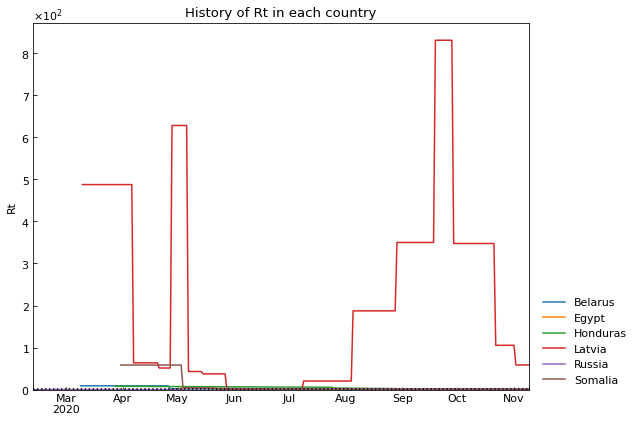

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-05,1.77,1.78,1.26,58.82,1.52,0.0
2020-11-06,1.77,1.78,1.26,58.82,1.52,0.0
2020-11-07,1.77,1.78,1.26,58.82,1.52,0.0
2020-11-08,1.77,1.78,1.26,58.82,1.52,0.0
2020-11-09,1.77,1.78,1.26,58.82,1.52,0.0


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

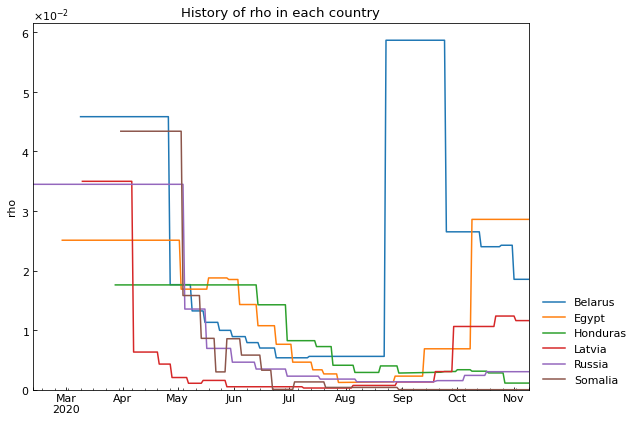

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-05,0.018532,0.028594,0.001111,0.0116,0.003023,0.0
2020-11-06,0.018532,0.028594,0.001111,0.0116,0.003023,0.0
2020-11-07,0.018532,0.028594,0.001111,0.0116,0.003023,0.0
2020-11-08,0.018532,0.028594,0.001111,0.0116,0.003023,0.0
2020-11-09,0.018532,0.028594,0.001111,0.0116,0.003023,0.0


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

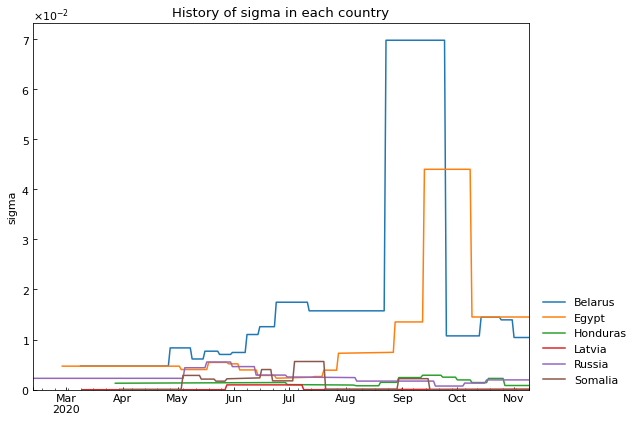

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-05,0.010417,0.014507,0.000839,0.000117,0.001955,0.0
2020-11-06,0.010417,0.014507,0.000839,0.000117,0.001955,0.0
2020-11-07,0.010417,0.014507,0.000839,0.000117,0.001955,0.0
2020-11-08,0.010417,0.014507,0.000839,0.000117,0.001955,0.0
2020-11-09,0.010417,0.014507,0.000839,0.000117,0.001955,0.0


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

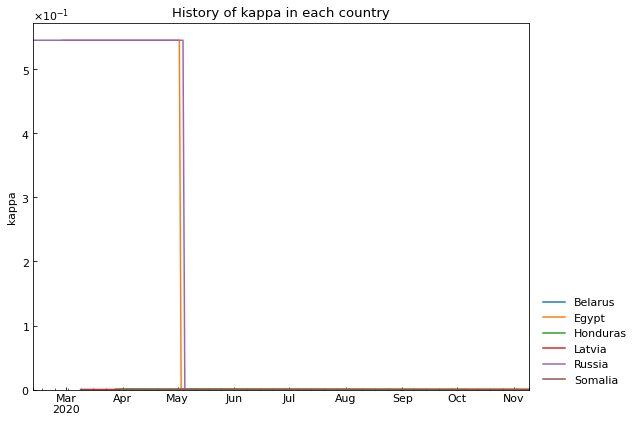

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-05,0.000071,0.000707,0.000041,0.000079,0.000036,0.000122
2020-11-06,0.000071,0.000707,0.000041,0.000079,0.000036,0.000122
2020-11-07,0.000071,0.000707,0.000041,0.000079,0.000036,0.000122
2020-11-08,0.000071,0.000707,0.000041,0.000079,0.000036,0.000122
2020-11-09,0.000071,0.000707,0.000041,0.000079,0.000036,0.000122


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

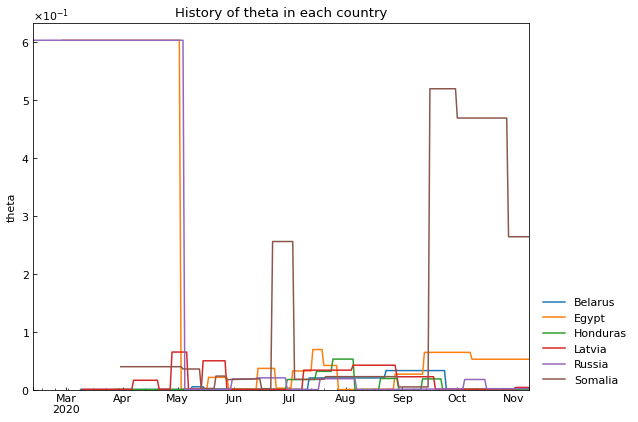

Country,Belarus,Egypt,Honduras,Latvia,Russia,Somalia
Date,,,,,,
2020-11-05,0.001095,0.052581,0.000021,0.003924,0.001782,0.26381
2020-11-06,0.001095,0.052581,0.000021,0.003924,0.001782,0.26381
2020-11-07,0.001095,0.052581,0.000021,0.003924,0.001782,0.26381
2020-11-08,0.001095,0.052581,0.000021,0.003924,0.001782,0.26381
2020-11-09,0.001095,0.052581,0.000021,0.003924,0.001782,0.26381


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53661 entries, 0 to 53730
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 53661 non-null  datetime64[ns]
 1   Country                              53661 non-null  object        
 2   Rt                                   53661 non-null  float64       
 3   theta                                53661 non-null  float64       
 4   kappa                                53661 non-null  float64       
 5   rho                                  53661 non-null  float64       
 6   sigma                                53661 non-null  float64       
 7   School_closing                       53661 non-null  int64         
 8   Workplace_closing                    53661 non-null  int64         
 9   Cancel_events                        53661 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.222951,-0.230306,0.120533,-0.303269,-0.399741,-0.322872,-0.187403,-0.304565,0.218856,-0.360881,-0.063705,-0.198748,-0.017813,-0.173040,-0.290368,-0.288080
theta,-0.222951,1.000000,0.994298,0.729598,0.144611,-0.224499,-0.250139,-0.169163,-0.288661,-0.504435,-0.115031,0.018258,0.229992,-0.475165,-0.239298,-0.111221,0.048509
kappa,-0.230306,0.994298,1.000000,0.750647,0.153160,-0.219369,-0.242071,-0.156317,-0.269464,-0.514691,-0.102777,-0.000145,0.235893,-0.482033,-0.236825,-0.110555,0.046887
rho,0.120533,0.729598,0.750647,1.000000,0.156003,-0.368066,-0.418283,-0.142324,-0.256788,-0.529989,-0.246323,0.012828,0.198596,-0.547770,-0.491965,-0.429951,-0.037480
sigma,-0.303269,0.144611,0.153160,0.156003,1.000000,0.156591,0.136524,0.194603,0.119716,-0.399429,0.223317,0.167585,0.189954,-0.100923,0.162227,0.195805,0.198453
School_closing,-0.399741,-0.224499,-0.219369,-0.368066,0.156591,1.000000,0.945262,0.833145,0.788088,-0.055630,0.904270,0.039545,0.418783,0.697209,0.496527,0.622871,0.751090
Workplace_closing,-0.322872,-0.250139,-0.242071,-0.418283,0.136524,0.945262,1.000000,0.813627,0.794547,-0.007260,0.902450,-0.017161,0.368124,0.721469,0.571060,0.676614,0.719493
Cancel_events,-0.187403,-0.169163,-0.156317,-0.142324,0.194603,0.833145,0.813627,1.000000,0.766150,-0.112699,0.828715,0.072258,0.623545,0.637387,0.264893,0.382617,0.781714
Gatherings_restrictions,-0.304565,-0.288661,-0.269464,-0.256788,0.119716,0.788088,0.794547,0.766150,1.000000,-0.048775,0.776466,0.008636,0.505493,0.560741,0.255211,0.285219,0.662462
Transport_closing,0.218856,-0.504435,-0.514691,-0.529989,-0.399429,-0.055630,-0.007260,-0.112699,-0.048775,1.000000,-0.158626,0.157839,-0.361902,0.385636,0.038974,0.024179,-0.258200


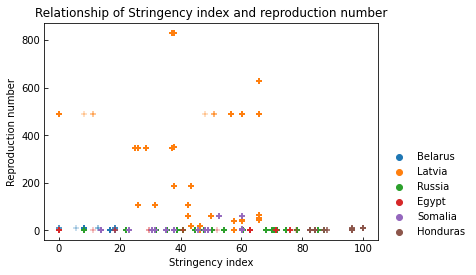

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()